In [1]:
import pandas as pd

df = pd.read_csv("fish_all.csv")

In [2]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [4]:
df.loc[df['Species']=='Perch','Species'] = 0
df.loc[df['Species']=='Bream','Species'] = 1
df.loc[df['Species']=='Roach','Species'] = 2
df.loc[df['Species']=='Pike','Species'] = 3
df.loc[df['Species']=='Smelt','Species'] = 4
df.loc[df['Species']=='Parkki','Species'] = 5
df.loc[df['Species']=='Whitefish','Species'] = 6
df['Species'] = df['Species'].astype(int)

In [5]:
feature = df[df.keys().drop('Species')]
outcome = df['Species']

In [6]:
from sklearn.model_selection import train_test_split

train_feature, test_feature, train_target, test_target = train_test_split(feature, outcome, stratify=outcome, random_state=42)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
train_feature_pca = pca.fit_transform(train_feature)
test_feature_pca = pca.transform(test_feature)

In [8]:
pca.explained_variance_ratio_

array([9.99573337e-01, 3.46579620e-04])

In [9]:
pca.explained_variance_ratio_[0]

0.9995733370668612

In [10]:
pca.explained_variance_ratio_[1]

0.0003465796198566511

In [11]:
keys = sorted(outcome.unique())

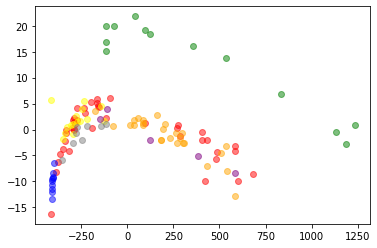

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

color = ["red","orange","yellow","green","blue","gray","purple"]

for k in keys:
    selected_item_feature = train_feature_pca[train_target==k]
    plt.scatter(selected_item_feature[:,0],selected_item_feature[:,1], c=color[k], alpha=0.5)
plt.show()

In [13]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2)
train_feature_lle = lle.fit_transform(train_feature)
test_feature_lle = lle.transform(test_feature)

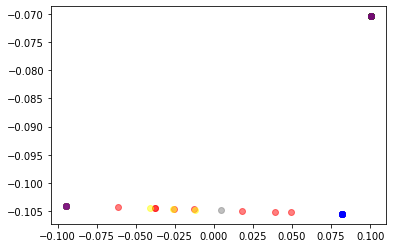

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

color = ["red","orange","yellow","green","blue","gray","purple"]

for k in keys:
    selected_item_feature = train_feature_lle[train_target==k]
    plt.scatter(selected_item_feature[:,0],selected_item_feature[:,1], c=color[k], alpha=0.5)
plt.show()

In [15]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2,n_neighbors = 10)
train_feature_lle = lle.fit_transform(train_feature)
test_feature_lle = lle.transform(test_feature)

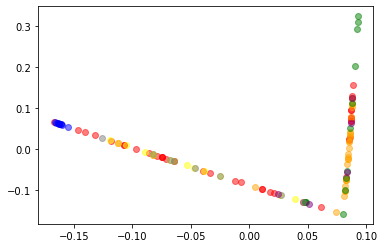

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

color = ["red","orange","yellow","green","blue","gray","purple"]

for k in keys:
    selected_item_feature = train_feature_lle[train_target==k]
    plt.scatter(selected_item_feature[:,0],selected_item_feature[:,1], c=color[k], alpha=0.5)
plt.show()